# <p style="text-align: right;">Varun Sridhar (vks377)</p>
# <p style="text-align: right;">Atreya Misra (am73676)</p>
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 40</p>
## <p style="text-align: center;">Due: Thursday, November 30th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ensembles (1+12+2 = 15pts)
In this question, we will compare performance of different ensemble methods: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [XGBoost](http://xgboost.readthedocs.io/en/latest/).  Note that you have to install xgboost package in addition to scikit-learn.  You can see installation guides [here](http://xgboost.readthedocs.io/en/latest/build.html).




Two  datasets are provided for this problem. For **each of the datasets ((X1.csv, y1.csv), (X2.csv, y2.csv))**, do the following:

1. Load the data and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42.

2. Build a classifier using [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [XGBoost](http://xgboost.readthedocs.io/en/latest/), respectively, and answer the following for each classifier.

 - Mention any design choices (with reasoning/justification) that you made, e.g. the hyperparameters considered for each classifier.
 - Report the mean error rate (fraction of incorrect labels) and the confusion matrix on test data. <br>
 - Report the feature importance and time of execution (training and predicting times).

3. Compare the three classifiers for the two different datasets ((X1.csv, y1.csv), (X2.csv, y2.csv)) in terms of the misclassification rate.  What are the characteristics of the dataset and the classifiers that resulted in somewhat different comparative results?

In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import zero_one_loss
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import timeit
%matplotlib inline

## Dataset 1

In [17]:
X1 = pd.read_csv("X1.csv")
y1 = pd.read_csv("y1.csv")

print("Result of Random Forest:")

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

rfclf=RandomForestClassifier(max_depth=2, random_state=0)

start_time = timeit.default_timer()

rfclf.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time

print("Training Time:")
print(elapsed)

start_time = timeit.default_timer()

y_pred=rfclf.predict(X_test)

elapsed = timeit.default_timer() - start_time

print("Predicting Time:")
print(elapsed)

imp=rfclf.feature_importances_

print("Feature Importance:")
print(imp)

error=zero_one_loss(y_test, y_pred)
print("Mean Error:")
print (error)

conf=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf)

print("Result of Gradient Boosting:")

gbclf=GradientBoostingClassifier(learning_rate=0.01, n_estimators=100)

start_time = timeit.default_timer()

gbclf.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time

print("Training Time:")
print(elapsed)

start_time = timeit.default_timer()

y_pred=gbclf.predict(X_test)

elapsed = timeit.default_timer() - start_time

print("Predicting Time:")
print(elapsed)

imp=gbclf.feature_importances_

print("Feature Importance:")
print(imp)

error=zero_one_loss(y_test, y_pred)
print("Mean Error:")
print (error)

conf=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf)

print("Result of XGBoost:")

xgbclf=XGBClassifier(n_estimators=100, max_depth=500, learning_rate=0.01)

start_time = timeit.default_timer()

xgbclf.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time

print("Training Time:")
print(elapsed)

start_time = timeit.default_timer()

y_pred=xgbclf.predict(X_test)

elapsed = timeit.default_timer() - start_time

print("Predicting Time:")
print(elapsed)

imp=xgbclf.feature_importances_

print("Feature Importance:")
print(imp)

error=zero_one_loss(y_test, y_pred)
print("Mean Error:")
print (error)

conf=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf)

print("All paramaters were decided after parameter tuning")

Result of Random Forest:
Training Time:
0.08943119906358987
Predicting Time:
0.004732012528855023
Feature Importance:
[  1.38209466e-01   2.34387999e-02   1.36209609e-04   1.65436724e-02
   4.28460042e-02   0.00000000e+00   3.25945442e-02   0.00000000e+00
   0.00000000e+00   1.48585171e-03   5.11528737e-02   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.18759142e-03   3.05401981e-02
   0.00000000e+00   0.00000000e+00   1.05927647e-01   0.00000000e+00
   0.00000000e+00   2.91087066e-01   1.95915206e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00   4.15098390e-02   2.34250303e-02
   0.00000000e+00   0.00000000e+00]
Mean Error:
0.159393939394
Confusion Matrix:
[[1358  342]
 [ 184 1416]]
Result of Gradient Boosting:


C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Time:
3.372722741282878
Predicting Time:
0.013487395951727876
Feature Importance:
[ 0.01701923  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.06358722  0.          0.
  0.07905027  0.84034328  0.          0.          0.          0.          0.
  0.          0.        ]
Mean Error:
0.14696969697
Confusion Matrix:
[[1401  299]
 [ 186 1414]]
Result of XGBoost:


C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Time:
4.257799185776115
Predicting Time:
0.02560391841338827
Feature Importance:
[ 0.10787708  0.0259435   0.02201137  0.02175493  0.01829294  0.02081463
  0.02483224  0.02389195  0.02286618  0.02654186  0.02602898  0.01948968
  0.02696927  0.01884857  0.02410566  0.02590076  0.02145574  0.02402017
  0.13142711  0.02722571  0.02055819  0.11702355  0.07056461  0.02008804
  0.01654058  0.02359277  0.01598496  0.01948968  0.01410437  0.02175493]
Mean Error:
0.0842424242424
Confusion Matrix:
[[1541  159]
 [ 119 1481]]
All paramaters were decided after parameter tuning


## Dataset 2

In [18]:
X2 = pd.read_csv("X2.csv")
y2 = pd.read_csv("y2.csv")

print("Result of Random Forest:")

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

rfclf=RandomForestClassifier(max_depth=2, random_state=0)

start_time = timeit.default_timer()

rfclf.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time

print("Training Time:")
print(elapsed)

start_time = timeit.default_timer()

y_pred=rfclf.predict(X_test)

elapsed = timeit.default_timer() - start_time

print("Predicting Time:")
print(elapsed)

imp=rfclf.feature_importances_

print("Feature Importance:")
print(imp)

error=zero_one_loss(y_test, y_pred)
print("Mean Error:")
print (error)

conf=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf)

print("Result of Gradient Boosting:")

gbclf=GradientBoostingClassifier(learning_rate=0.01, n_estimators=100)

start_time = timeit.default_timer()

gbclf.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time

print("Training Time:")
print(elapsed)

start_time = timeit.default_timer()

y_pred=gbclf.predict(X_test)

elapsed = timeit.default_timer() - start_time

print("Predicting Time:")
print(elapsed)

imp=gbclf.feature_importances_

print("Feature Importance:")
print(imp)

error=zero_one_loss(y_test, y_pred)
print("Mean Error:")
print (error)

conf=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf)

print("Result of XGBoost:")

xgbclf=XGBClassifier(n_estimators=100, max_depth=500, learning_rate=0.01)

start_time = timeit.default_timer()

xgbclf.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time

print("Training Time:")
print(elapsed)

start_time = timeit.default_timer()

y_pred=xgbclf.predict(X_test)

elapsed = timeit.default_timer() - start_time

print("Predicting Time:")
print(elapsed)

imp=xgbclf.feature_importances_

print("Feature Importance:")
print(imp)

error=zero_one_loss(y_test, y_pred)
print("Mean Error:")
print (error)

conf=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf)

print("All parameters were decided after parameter tuning")

Result of Random Forest:
Training Time:
0.04593988059298226
Predicting Time:
0.0037542834218413645
Feature Importance:
[ 0.          0.          0.          0.05571409  0.06400119  0.10556154
  0.05310405  0.10294685  0.04726098  0.2009072   0.          0.11332271
  0.          0.04161565  0.          0.07828738  0.01965206  0.
  0.11762631  0.        ]
Mean Error:
0.225454545455
Confusion Matrix:
[[600 254]
 [118 678]]
Result of Gradient Boosting:


C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Time:
1.0736277766100955
Predicting Time:
0.007320696485834333
Feature Importance:
[ 0.          0.          0.          0.05246948  0.03295974  0.03844636
  0.          0.08152924  0.00443394  0.29515506  0.          0.14279146
  0.          0.07797797  0.          0.11471091  0.06973425  0.
  0.08979158  0.        ]
Mean Error:
0.166060606061
Confusion Matrix:
[[696 158]
 [116 680]]
Result of XGBoost:


C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Time:
1.2450248939380373
Predicting Time:
0.009443943903079344
Feature Importance:
[ 0.03750335  0.02370747  0.01741227  0.06549692  0.0763461   0.05598714
  0.04687919  0.05672381  0.05511653  0.05464774  0.05150013  0.06623359
  0.02980177  0.08418162  0.02015805  0.06007233  0.06683633  0.02042593
  0.06583177  0.04513796]
Mean Error:
0.112121212121
Confusion Matrix:
[[747 107]
 [ 78 718]]
All parameters were decided after parameter tuning


# Question 2: Visualization using Bokeh (10 pts)

In this problem, you'll build an interactive visualization. Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. For more information on Bokeh, see http://bokeh.pydata.org/en/latest/. The problem statement is as follows:

Using the "nbasalariesfull.csv" data set from HMK4, your goal is to build a Bokeh visualization which allows the user to explore how salary (on a log scale) varies with points per game (PSG) and age. You will create a visualization that allows the user to toggle the X axis of a scatter plot between PSG and age, with the y-axis always being log Salary. Also add the hover tool so that if the user hovers over a datapoint in the plot a window pops up that shows the player name, team, position, salary, and the current x variable (PSG or age) depending on the current tab.  Color each point according to a player's position and provide a legend for the colors. Add the ability to Zoom in/out.  Add slight horizontal jitter to a player's age.

Hints: 
1. see: http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#basic-tooltips for hover and zoom tool examples.
2. See: http://bokeh.pydata.org/en/latest/docs/reference/plotting.html. Look for the scatter API.
3. See: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/styling.html#labels. For labeling axes.
4. See: https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html  for how to use jitter transform
5. Use output_notebook() from Bokeh to output the plot to your notebook

In [69]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import CustomJS, ColumnDataSource, HoverTool, BoxZoomTool
from bokeh.transform import jitter
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Legend

data = pd.read_csv("nbasalariesfull.csv")
data["logsalary"] = data.SALARY.apply(np.log)

colors = { 'PG': 'blue',
           'SG': 'green',
           'SF': 'red',
           'PF': 'yellow',
           'C': 'black',
           'PF-C': 'purple',
           'SG-SF': 'gray' }

data['Color'] = data['Player']
for i in range(len(data['Color'])):
    data['Color'][i] = colors[data['Pos'][i]]

source = ColumnDataSource(data)

panels = []
for xaxis_type in ['PSG', 'Age']:
    hover = HoverTool(tooltips=[
    ("Player", "@Player"),
    ("Team", "@Tm"),
    ("Position", "@Pos"),
    ("Salary", "@SALARY"),
    (xaxis_type, "$x")
    ])
    t = 'NBA Salaries vs. ' + xaxis_type
    p = figure(plot_width=600, plot_height=600, tools=[hover, 'wheel_zoom'],
           title=t)
    if xaxis_type is 'PSG':
        p.scatter(xaxis_type,'logsalary', size=5, source=source, color = 'Color', legend = 'Pos')
    else:
        p.scatter(x=jitter(xaxis_type, width = 0.6),y='logsalary', size=5, source=source, color = 'Color', legend = 'Pos')
    p.legend.location = "bottom_right"
    p.xaxis.axis_label = xaxis_type
    p.yaxis.axis_label = "Log Salary"
    
    panel = Panel(child = p, title = xaxis_type)
    panels.append(panel)

tabs = Tabs(tabs=panels)
    
output_notebook()

show(tabs)

Loading BokehJS ...

# Question 3: Clustering (15 pts)
## Part a

This problem explores scaling, clustering, and one method of evaluating the quality of a clustering. You will also examine some of the issues in k-means clustering, and some ways to mitigate these problems. You will be using Fisher's Iris dataset available in sklearn.

We wish to cluster the dataset to find any similar groups of flowers. However, we are not certain that the scales of the various features are well-suited for clustering. We will use scipy's k-means clustering package for this problem.

When calculating the cluster purity, use the following equations:

$ClassPurity(C_i$) = $\frac{1}{|C_i|}\max_j(|C_i|_{class=j})$

$NetPurity$ = $\sum_{i=1}^k\frac{|C_i|}{|D|}purity(C_i)$

where $|C_i|$ is the total number of data points assigned to cluster $C_i$, $|C_i|_{class=j}$ is the number of data points from class $j$ assigned to cluster $C_i$ and $D$ refers to the whole dataset.

1. Cluster the data into 4 clusters, using K-means and calculate the NetPurity for your solution.
2. Now linearly scale each feature so that the values range from 0 to 1. Cluster the data using the k-means algorithm (as before), and calculate the cluster purity for the clustering. Report the calculations you used to scale the features, as well as the NetPurity.
3. Linearly scale the original dataset features so that the distribution of values for each feature has a mean of 0 and a standard deviation of 1. Cluster the data as before, and report the NetPurity obtained.



In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

def classPurity(actual, predicted, classNum):
    s = np.stack((actual, predicted), axis = 1)

    df = pd.DataFrame(data = s, index = None, columns = ["actual", "predicted"])
    df['agg'] = pd.Series(np.ones(s.shape[0], ))
    table = pd.pivot_table(df, index = ['predicted', 'actual'], aggfunc = np.sum)
    return (table['agg'][classNum][np.argmax(table['agg'][classNum])], np.sum(table['agg'][classNum]))

def netPurity(actual, predicted):
    s = np.stack((actual, predicted), axis = 1)
    df = pd.DataFrame(data = s, index = None, columns = ["actual", "predicted"])
    total = 0.0
    for x in df.predicted.unique():
        total += classPurity(actual, predicted, x)[0]
    total = total/(float(s.shape[0]))
    return total

iris = datasets.load_iris()
kmeans = KMeans(n_clusters = 4)

kmeans.fit(iris.data)
predict = kmeans.labels_
print("1. ", netPurity(iris.target, predict))

scaledIris = (iris.data - np.min(iris.data, axis = 0))*1.0/(np.max(iris.data, axis = 0) - np.min(iris.data, axis = 0))
kMeansScaled = KMeans(n_clusters = 4, random_state = 0)
kMeansScaled.fit(scaledIris)
scaledPredictions = kMeansScaled.labels_
print("2. ", netPurity(iris.target, scaledPredictions))

normIris = (iris.data - np.mean(iris.data, axis = 0))*1.0/(np.std(iris.data, axis = 0))
kMeansNorm = KMeans(n_clusters = 4, random_state = 0)
kMeansNorm.fit(normIris)
normPredictions = kMeansNorm.labels_
print("3. ", netPurity(iris.target, normPredictions))


1.  0.88
2.  0.86
3.  0.846666666667


## Part b

Run both single link and complete link hierarchical clustering algorithms on the iris dataset, and submit the two dendograms. 

1. For each dendogram, visually inspect it to suggest what value(s) of $k$ (between 1 and 6) seem reasonable to choose for this dataset. 
2. Do you observe any difference in the structure of the 2 dendograms? How do you explain this difference?

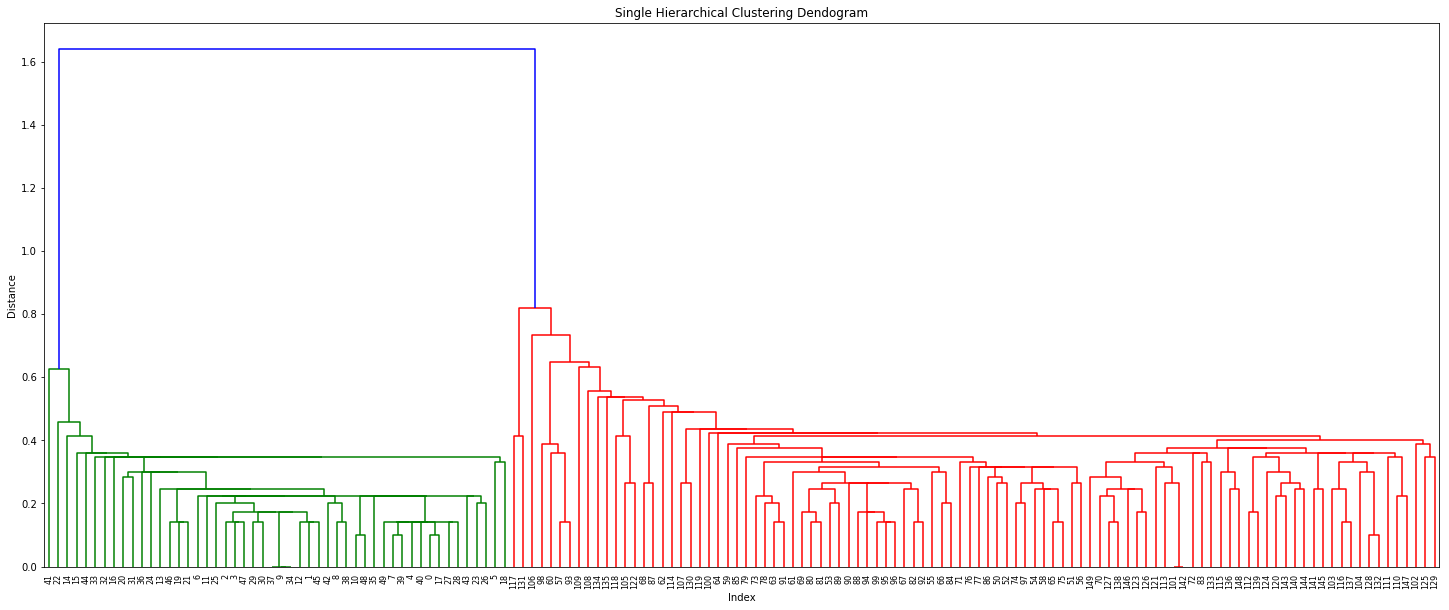

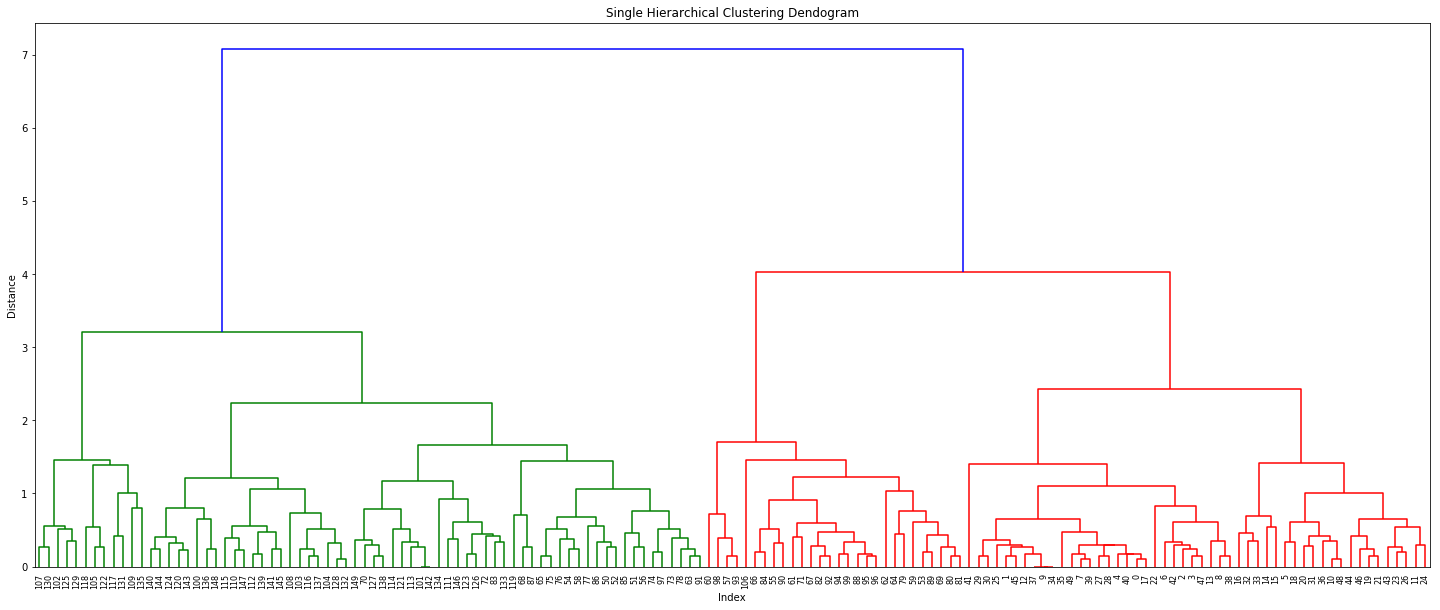

In [10]:
% matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets

iris = datasets.load_iris()

link = linkage(iris.data, method = 'single')
plt.figure(figsize = (25, 10))
plt.title('Single Hierarchical Clustering Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(link, leaf_rotation = 90.0, leaf_font_size = 8.0)
plt.show()

link = linkage(iris.data, method = 'complete')
plt.figure(figsize = (25, 10))
plt.title('Single Hierarchical Clustering Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(link, leaf_rotation = 90.0, leaf_font_size = 8.0)
plt.show()

## Part c

1. What is the cost function minimised in the k-means clustering algorithm?
2. Explain how this can be generalized to be of the form $J = \sum_{i=1}^k n_i s_i$, where $s_i$ is the average squared (Euclidean) distance between pairs of points in cluster $i$ (every point is compared with every point - including itself - in the same cluster, so we have $n_i^2$ comparisions that are averaged over to get $s_i$), 
and $n_i$ is the total number of points in cluster $i$.
3. What would the benefit of such a generalized expression be?

1. Standard Expression, $J = \sum_{i=1}^k \sum_{x \in S_i} ||x-\mu_i||^2$, where \mu_i is the mean of the points in S_i
2. Generalized expression, 
    $J = \sum_{i=1}^k n_i * (||x-\mu_i||^2 /n_i)$ where n_i is the number of samples in each cluster
    
    $J = \sum_{i=1}^k n_i * s_i $ where s_i is the variance within each cluster

3. Benefit: $s_i$ can now be replaced with any similarity metric based on the clustering problem requirements